In [1]:
import torch
import numpy as np
from torch.utils.data import DataLoader

from attrbench.evaluation.independent import impact_coverage
from attrbench.lib import PixelMaskingPolicy
from experiments.lib.util import get_ds_model, get_methods
from experiments.test.util import imshow, attrshow, show_img_attrs

# Initialization and parameters

In [2]:
BATCH_SIZE = 4
DATASET = "ImageNette"
MODEL = "resnet18"
METHOD = "IntegratedGradients"

patch = torch.load(f"../../data/patches/{DATASET}/{MODEL}.pt")
device = "cuda" if torch.cuda.is_available() else "cpu"
dataset, model = get_ds_model(DATASET, MODEL)
methods = get_methods(model, aggregation_fn="avg", normalize=False, methods=[METHOD],
                      batch_size=BATCH_SIZE, sample_shape=dataset.sample_shape[-2:])

model.to(device)
for param in model.parameters():
    param.requires_grad = False
model.eval()
pmp = PixelMaskingPolicy(0.)
method = methods[METHOD]

# Run Impact Coverage

In [3]:
batch, labels = next(iter(DataLoader(dataset, BATCH_SIZE, num_workers=4, shuffle=True)))
batch = batch.to(device)
labels = labels.to(device)
iou, keep, debug_data = impact_coverage(batch, labels, model, method, patch, target_label=0, debug_mode=True)

# Plot results

## Plot the original samples and their attributions

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


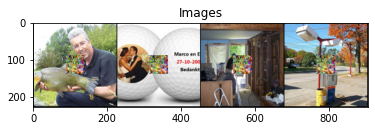

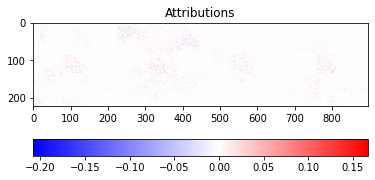

In [4]:
show_img_attrs(dataset.denormalize(batch.detach()), debug_data["attrs"])